# Region Availabilities

Showing availability information for muultiple periods for regions on maps. Availability can be anything, such as energy.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import json
import jsonschema

/Users/peterjanes/.local/share/virtualenvs/python38-O-C_Z_QB/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# reading regions
# Swiss Kantons for this example, but can be any region list (for later display as shapes on map)
shapeFilename = "SHAPEFILE_LV95_LN02/swissBOUNDARIES3D_1_3_TLM_KANTONSGEBIET.shp"

# schema filename
schemaFilename = "AvailabilityMapSchema.json"
# availability filename
availabilityFilename = "AvailabilityMapProvider3.json"

## Loading Regions

Using Kantons for this example. Could be other regions as well - e.g. municipalities, electtrical power sections, etc.

In [3]:
shape_regions = gpd.read_file(shapeFilename)

In [4]:
shape_regions.head()

UUID  DATUM_AEND  DATUM_ERST  ERSTELL_J  \
0  {0B2364ED-49E0-4D53-A33C-C684DD530B57}  2018-11-22  2012-10-26       2012   
1  {DDD56CEF-0E61-4EED-85ED-F67A459C93ED}  2021-11-02  2012-10-26       2012   
2  {54B25E50-30A7-4995-ADE3-5FFF6E13A995}  2018-11-22  2012-10-26       2012   
3  {921DFEF2-6D91-4CB8-9CFC-2A831C412020}  2019-11-06  2012-10-26       2012   
4  {95F10F52-8B2F-4D6A-AF7E-D4F915E42F89}  2020-11-19  2012-10-26       2012   

  ERSTELL_M  REVISION_J REVISION_M  GRUND_AEND   HERKUNFT  HERKUNFT_J  ...  \
0        10        2022          5  Verbessert         AV        2019  ...   
1        10        2022          5  Verbessert         AV        2021  ...   
2        10        2022          5  Verbessert         AV        2019  ...   
3        10        2022          5  Verbessert  swisstopo        2019  ...   
4        10        2022          5  Verbessert         AV        2020  ...   

  OBJEKTART   REVISION_Q ICC KANTONSNUM  SEE_FLAECH  KANTONSFLA  KT_TEIL  \
0    Kanton  2021_Aufbau  CH         18         NaN    710530.0        0   
1    Kanton  2021_Aufbau  CH          2     11897.0    595850.0        1   
2    Kanton  2021_Aufbau  CH         23      1060.0    522463.0        0   
3    Kanton  2021_Aufbau  CH         22     39097.0    321202.0        1   
4    Kanton  2021_Aufbau  CH         21      7147.0    281215.0        0   

         NAME EINWOHNERZ                                           geometry  
0  Graubünden   200096.0  POLYGON Z ((2735215.665 1194955.161 2870.714, ...  
1        Bern  1043081.0  POLYGON Z ((2595241.510 1169313.282 2090.846, ...  
2      Valais   348503.0  POLYGON Z ((2601807.628 1136116.777 2948.413, ...  
3        Vaud   814762.0  POLYGON Z ((2555092.813 1138713.419 372.133, 2...  
4      Ticino   350986.0  POLYGON Z ((2727358.511 1119219.094 1351.527, ...  

[5 rows x 21 columns]

<AxesSubplot:>

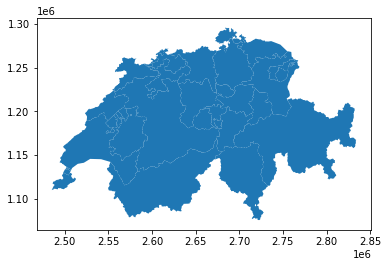

In [5]:
shape_regions.plot()

(2467987.8395499997, 2851280.09945, 1064234.8579, 1306966.9761)

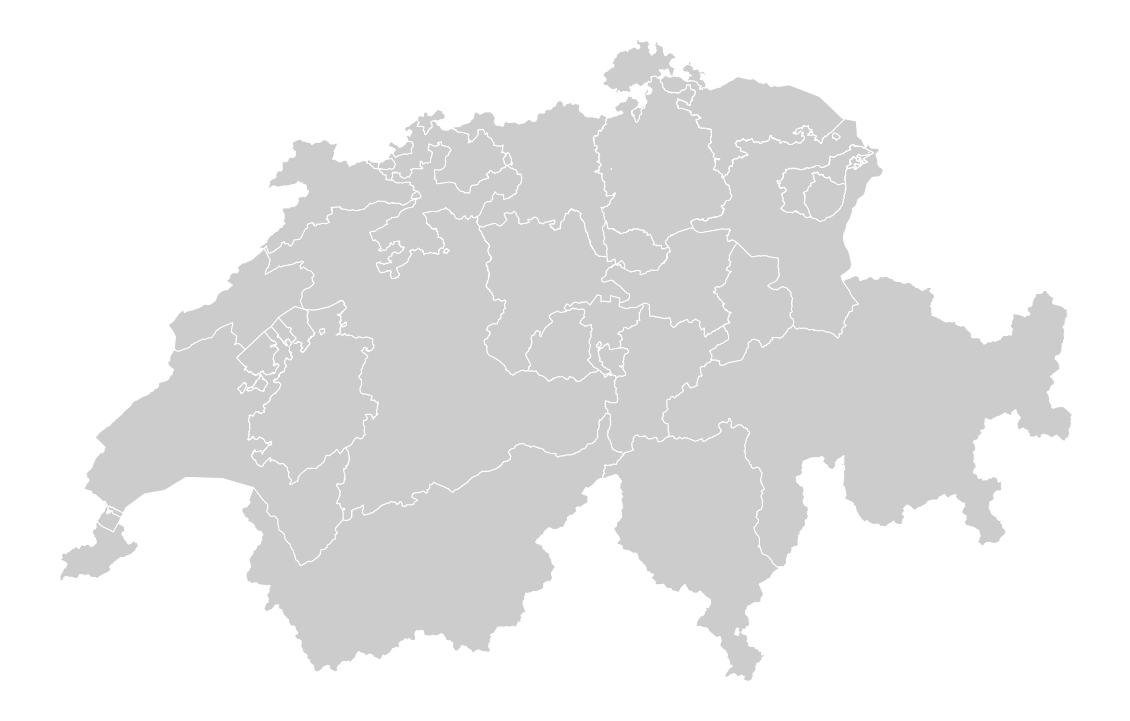

In [6]:
ax = shape_regions.plot(figsize=(20,20), color='#cccccc', edgecolor='white')
ax.axis('off')

## Loading availability information

In [7]:
f1 = open(availabilityFilename)
# returns JSON object as dictionary
regionAvailabilities = json.load(f1)
f1.close()
# regionAvailabilities

In [8]:
f2 = open(schemaFilename)
# returns JSON object as dictionary
availabilitiesSchema = json.load(f2)
f2.close()
# availabilitiesSchema

In [9]:
print('Schema validation errors:', jsonschema.validate(regionAvailabilities, availabilitiesSchema))

Schema validation errors: None


In [10]:
# availability period parameters
noOfPeriods = regionAvailabilities['regionPeriods']['noOfPeriods']
startDate = regionAvailabilities['regionPeriods']['startDate']
intervalHours = regionAvailabilities['regionPeriods']['intervalHours']

## Select current period for display on map

In [11]:
# set current period
current_period = 2

In [12]:
regionPeriodValues = regionAvailabilities['regionPeriods']['regionPeriodValues']
# regionPeriodValues

In [13]:
# create list for current period
r_current = []
for r in regionPeriodValues:
    r_current.append([r['region']['regionId'], r['periodValues'][current_period]])
# r_current

In [14]:
# convert to dataframe
r_current_df = pd.DataFrame(r_current, columns=['KANTONSNUM', 'Availability'])
# r_current_df.head()

In [15]:
# merge current period to region shapes
current_regions = shape_regions.merge(r_current_df, on='KANTONSNUM')
# current_regions.head()

In [16]:
regionColormap = matplotlib.colors.ListedColormap(['#333333','#dddddd'])

(2467987.8395499997, 2851280.09945, 1064234.8579, 1306966.9761)

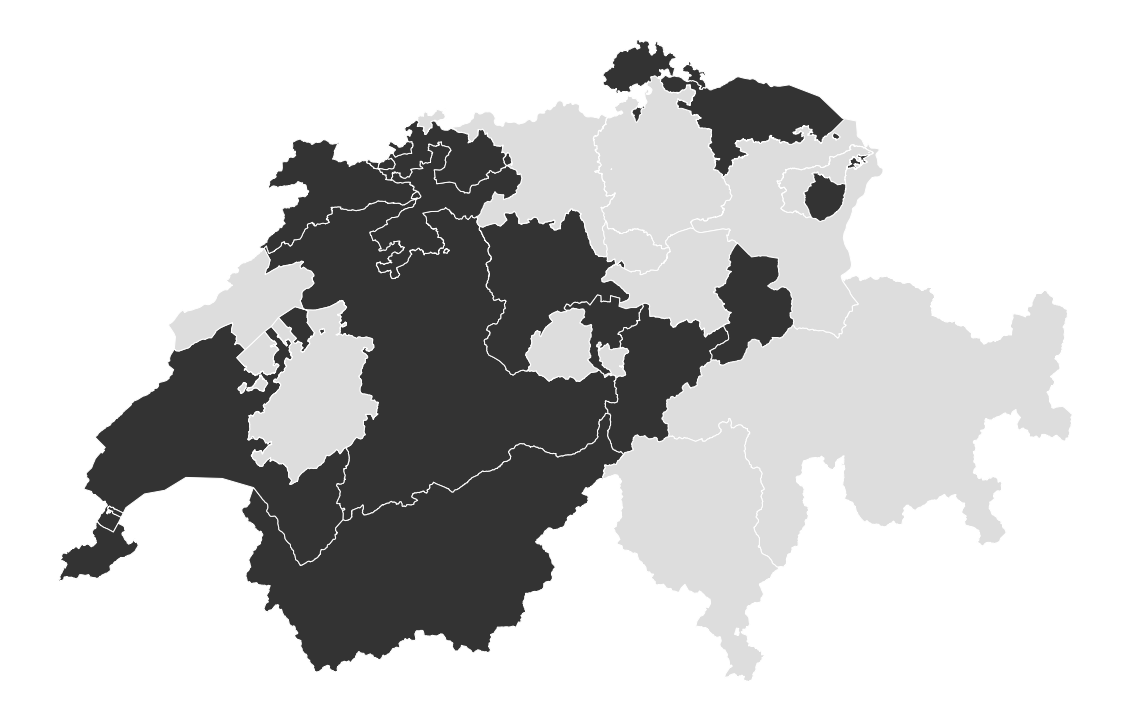

In [17]:
ax = current_regions.plot(figsize=(20,20), edgecolor='white', column='Availability', cmap=regionColormap)
ax.axis('off')

In [18]:
current_regions.explore(column='Availability', cmap=regionColormap)